## Assignment 3: Example-Dependent Cost Sensitive Logistic Regression

TEAM:
1. AAYUSH SHRIVASTAVA                - CS24MTECH02001
2. ANISH PAWAR                       - AI23MTECH14002
3. ANKIT PANDEY                      - AI23MTECH13002
4. PUNEET KUMAR RAJAN                - AI23MTECH11010
5. VIVEK TARACHANDANI                - AI23MTECH14008


In [1]:
# Importing Libraries
import sys
import math
import torch
import joblib
import sklearn
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
from tabulate import tabulate
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sys.modules['sklearn.externals.joblib'] = joblib
from pyea import GeneticAlgorithmOptimizer
from sklearn.model_selection import train_test_split

# Dataset Description

In [2]:
# Reading the dataset
df = pd.read_csv('C:\\Users\\india\Downloads\\CS6890\\CS6890\\dataset.csv')

In [3]:
df.head()

,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,Status,FNC
0,2,21,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
1,23,0,0.0,0.044,0.0,0.0,0.0,0.306179,0.0,0.0,0.0,1,0.0
2,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
3,5,18,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1,0.0
4,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147636 entries, 0 to 147635
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NotCount  147636 non-null  int64  
 1   YesCount  147636 non-null  int64  
 2   ATPM      147636 non-null  float64
 3   PFD       147636 non-null  float64
 4   PFG       147636 non-null  float64
 5   SFD       147636 non-null  float64
 6   SFG       147636 non-null  float64
 7   WP        147636 non-null  float64
 8   WS        147636 non-null  float64
 9   AH        147636 non-null  float64
 10  AN        147636 non-null  float64
 11  Status    147636 non-null  int64  
 12  FNC       147636 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 14.6 MB


In [5]:
# Missing values
print("\n Missing values")
print(df.isnull().sum())


 Missing values
NotCount    0
YesCount    0
ATPM        0
PFD         0
PFG         0
SFD         0
SFG         0
WP          0
WS          0
AH          0
AN          0
Status      0
FNC         0
dtype: int64


In [6]:
# Unique values
print("\nUnique values")
print(df.nunique())


Unique values
NotCount       24
YesCount       23
ATPM        22145
PFD         11948
PFG         18881
SFD          9375
SFG         14333
WP          41933
WS          66341
AH           8387
AN           3610
Status          2
FNC         74382
dtype: int64


In [7]:
# Correlation
print("\nCorrelation")
print(df.corr())


Correlation
          NotCount  YesCount      ATPM       PFD       PFG       SFD  \
NotCount  1.000000 -0.999538 -0.201583 -0.027841 -0.062107  0.061742   
YesCount -0.999538  1.000000  0.202316  0.028207  0.062665 -0.061347   
ATPM     -0.201583  0.202316  1.000000  0.097251  0.136461  0.107536   
PFD      -0.027841  0.028207  0.097251  1.000000  0.736129  0.132295   
PFG      -0.062107  0.062665  0.136461  0.736129  1.000000  0.159460   
SFD       0.061742 -0.061347  0.107536  0.132295  0.159460  1.000000   
SFG      -0.054421  0.054667  0.110474  0.856800  0.834735 -0.004582   
WP       -0.043635  0.044070  0.112493  0.885821  0.853672  0.234855   
WS       -0.158080  0.158988  0.440868  0.119806  0.158208  0.095391   
AH       -0.041203  0.041763  0.357161  0.032413  0.041306  0.050892   
AN       -0.029140  0.028938  0.188317  0.008660  0.016883  0.007580   
Status    0.746954 -0.747332 -0.171854 -0.024528 -0.051113  0.032051   
FNC       0.008039 -0.007798  0.114269  0.208524  0

In [8]:
# Basic statistics
print("\nDataset statistics\n")
print(df.describe(include='all'))


Dataset statistics

            NotCount       YesCount           ATPM            PFD  \
count  147636.000000  147636.000000  147636.000000  147636.000000   
mean        7.722107      15.220908       0.253245       0.027062   
std         7.574278       7.596921       0.366280       0.335509   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000      10.000000       0.001084       0.000000   
50%         4.000000      19.000000       0.033354       0.000000   
75%        13.000000      21.000000       0.394372       0.000000   
max        23.000000      22.000000       1.000000      79.837480   

                 PFG            SFD            SFG             WP  \
count  147636.000000  147636.000000  147636.000000  147636.000000   
mean        0.050789       0.021648       0.071709       0.271927   
std         0.373370       0.298285       1.135755       2.432425   
min         0.000000       0.000000       0.000000       0.000000   
25%         

In [9]:
# Dataset Description
print("Dataset Description")
print(f"Number of variables:\t\t{len(df.columns)}")
print(f"Number of observations:\t\t{len(df)}")
print(f"Missing cells:\t\t\t{df.isnull().sum().sum()}")
print(f"Missing cells (%):\t\t{df.isnull().sum().sum() / (len(df) * len(df.columns)):.1%}")
duplicated_rows = df[df.duplicated()]
print(f"Duplicate rows:\t\t\t{len(duplicated_rows)}")
print(f"Duplicate rows (%):\t\t{len(duplicated_rows) / len(df):.1%}")
print(f"Total size in memory:\t\t{df.memory_usage(deep=True).sum() / (1024*1024):.1f} MiB")
print(f"Average record size in memory:\t{df.memory_usage(deep=True).sum() / len(df):.1f} B")

Dataset Description
Number of variables:		13
Number of observations:		147636
Missing cells:			0
Missing cells (%):		0.0%
Duplicate rows:			21621
Duplicate rows (%):		14.6%
Total size in memory:		14.6 MiB
Average record size in memory:	104.0 B


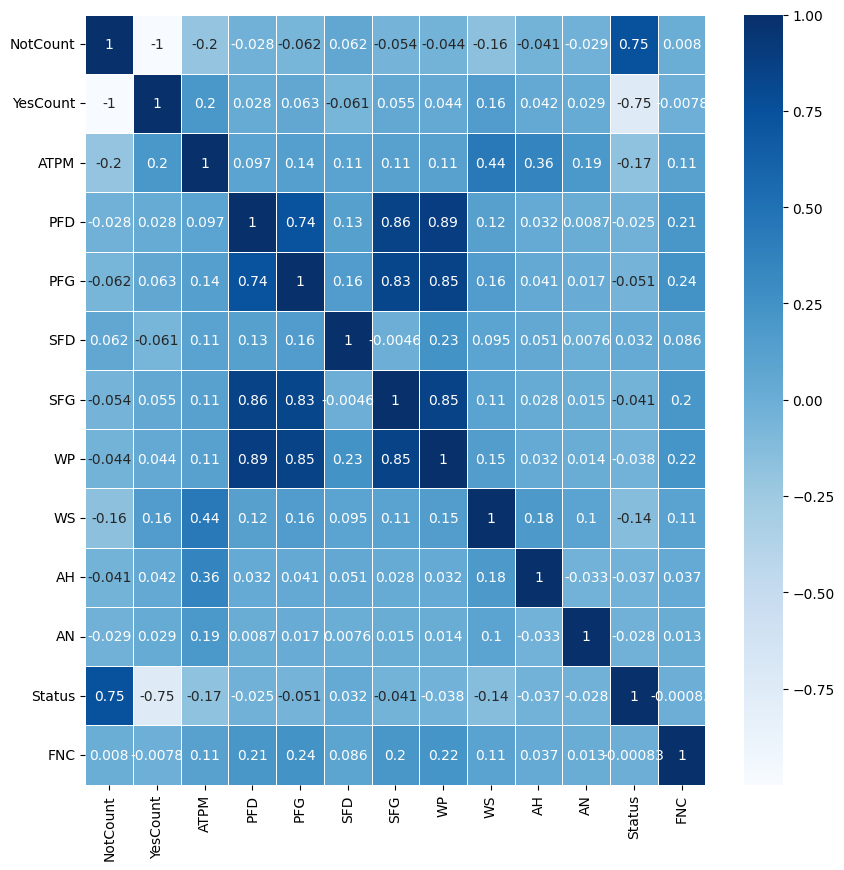

In [10]:
# Confusion Matrix (HeatMap)
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df.corr(), cmap = "Blues", annot = True,linewidth=.5,ax=ax)
plt.show()

In [11]:
# Counting the number of data rows having status bit 1 and 0
ones = 0
zeros = 0
for i in df.loc[:,'Status']:
    if i == 1:
      ones += 1
    else:
      zeros += 1  
print("No of rows with status 1 are ", ones)
print("No of rows with status 0 are ", zeros)

No of rows with status 1 are  44082
No of rows with status 0 are  103554


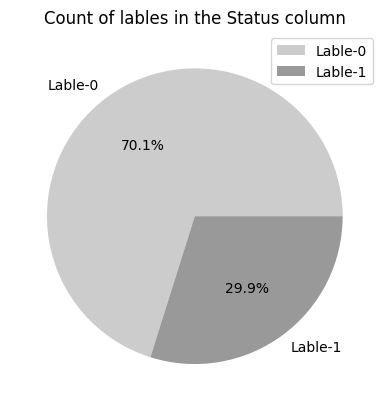

In [12]:
# Count the number of instances of each label in the 'Status' column of the dataset
status = df['Status'].value_counts()

# Create a list of labels for the pie chart
label = ["Lable-0", "Lable-1"]

# Extract the count for each label
zero = status[0]
one = status[1]

# Create an array of the counts
y = np.array([zero, one])

# Display a pie chart of the label counts
plt.pie(y, labels = label, autopct='%1.1f%%', colors=['#CCCCCC','#999999'])
plt.title('Count of lables in the Status column')
plt.legend()
plt.show() 

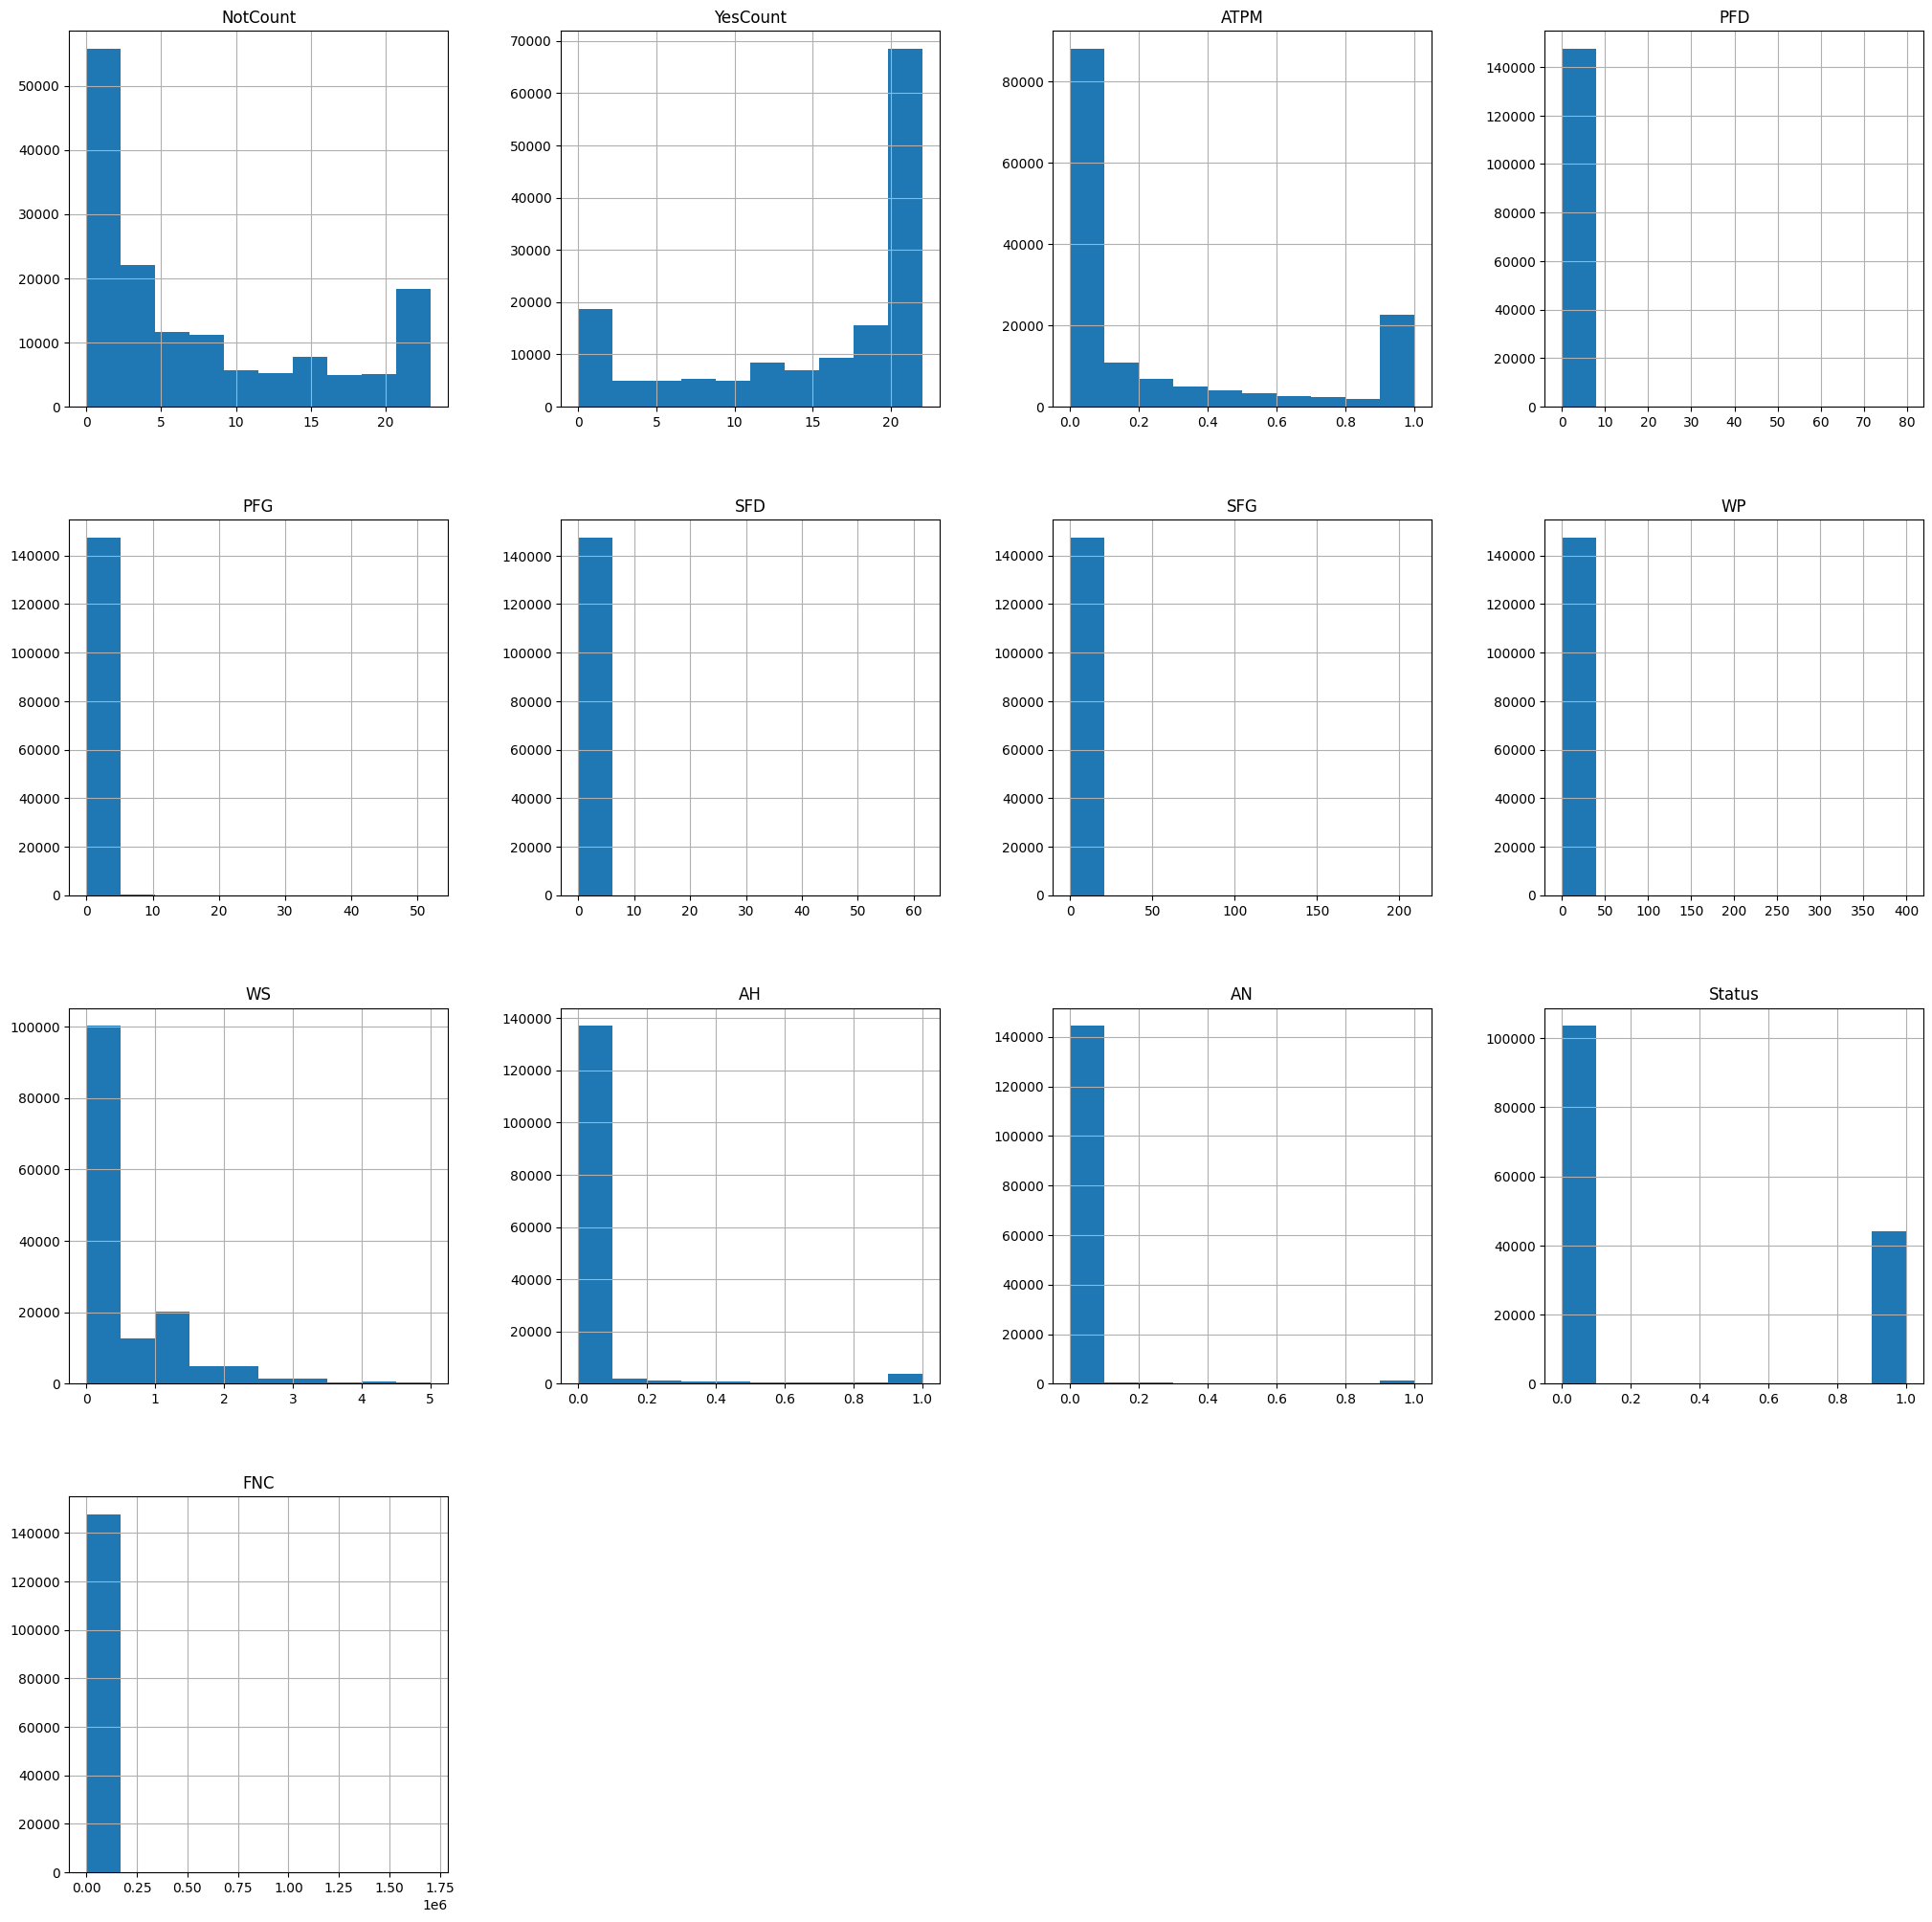

In [13]:
# Visualizing the data
df.hist(figsize = (25, 25))
plt.show()

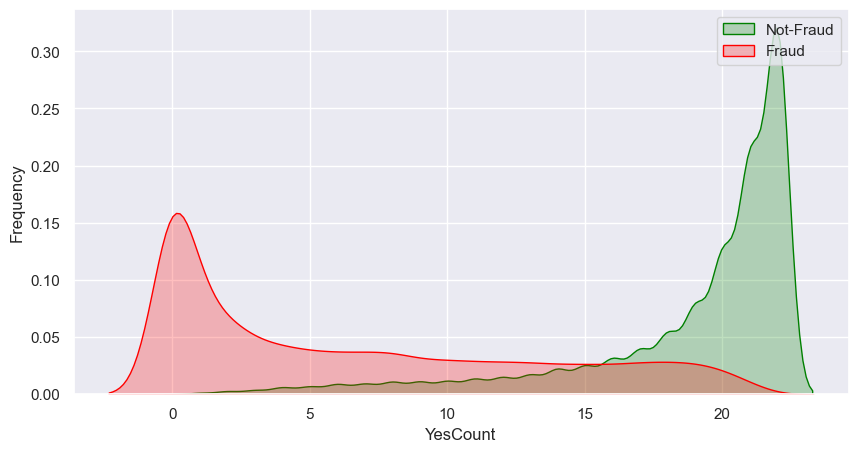

In [14]:
# Set the figure size
sns.set(rc={"figure.figsize": (10, 5)})

# Filter the dataset by non-null "YesCount" values and "Status" variable
Z = df.loc[(df["Status"] == 0) & (df["YesCount"].notnull()), "YesCount"] # Not-Fraud
O = df.loc[(df["Status"] == 1) & (df["YesCount"].notnull()), "YesCount"] # Fraud

# Create a KDE plot for the non-fraud cases
g = sns.kdeplot(Z, color="green", shade=True)

# Overlay a KDE plot for thr fraud cases
g = sns.kdeplot(O, ax=g, color="red", shade=True)

# Set the labels for the x and y axes
g.set_xlabel("YesCount")
g.set_ylabel("Frequency")

# Add a legend to identify non-fraud and fraud cases
g = g.legend(["Not-Fraud", "Fraud"])

#### Description of the dataset

1. Columns A to K are independent variables.
2. Column L is the dependent variable.
3. Column M is the false negative cost, varying from row to row based on the risk parameter details.
4. True Positive and False Positive cost is constant for all, which is 6.
5. True Negative cost is constant for all, which is  0.

In [15]:
# Separate the independent variables and the dependent variable
X = df.iloc[:, :11] # A to K
# X = df.drop(['Status'], axis = 1)

# Class Label
y = df.iloc[:, 11] # L
# y = df['Status']

#### Cost matrix of the classification problem Where the columns represents the costs of false positives, false negatives, true positives and true negatives.

In [16]:
# Cost Matrix
TP = np.full(147636, 6) # True Positive and False Positive cost is constant for all, which is 6
FP = np.full(147636, 6) # True Positive and False Positive cost is constant for all, which is 6
TN = np.zeros(147636)

cost_matrix = np.column_stack((FP, df['FNC'], TP, TN)).astype(float)

In [17]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

## Nikou Günnermann's Approach

#### Cost-Sensitive Loss function

$$
\begin{aligned}
J^c(\theta) = \frac{1}{M} \sum_{i=1}^{M}&\left( y_i \left(-\log(f(g(x_i, \theta)))C_{TP_i} - \log(1-f(g(x_i, \theta)))C_{FN_i}\right)\right. \\
&\left.+ (1-y_i)\left(-\log(f(g(x_i, \theta)))C_{FP_i} - \log(1-f(g(x_i, \theta)))C_{TN_i}\right) \right)
\end{aligned}
$$

In [18]:
def cost_sensitive_logistic_loss(y_true, y_pred, cost_matrix):
    # instance_loss = y_true * (-np.log(y_pred) * cost_matrix[:, 2] + -np.log(1 - y_pred) * cost_matrix[:, 1]) + (1 - y_true) * (-np.log(y_pred) * cost_matrix[:, 0] + -np.log(1 - y_pred) * cost_matrix[:, 3])
    # return np.sum(instance_loss)
    epsilon = 1e-15  # Small epsilon value to prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip y_pred to avoid 0 or 1
    instance_loss = y_true * (-np.log(y_pred) * cost_matrix[:, 2] - np.log(1 - y_pred) * cost_matrix[:, 1]) + (1 - y_true) * (-np.log(y_pred) * cost_matrix[:, 0] - np.log(1 - y_pred) * cost_matrix[:, 3])
    return np.sum(instance_loss)

# y_i = y_true
# f(g(x_{i},\beta)) = y_pre

# Function to calculate the sigmoid function 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [19]:
# Function to calculate saving score (Traditional LR VS Cost-Sensitive LR)
def saving_cost(lr_cost, cs_cost):
    saving_score = (lr_cost - cs_cost) / lr_cost
    return saving_score

In [20]:
def loss(weight, features, target, cost_matrix, alpha):
    if weight.size == features.shape[1] + 1:
        c = weight[-1]
        w = weight[:-1]
    else:
        c = 0
        w = weight
    probabilities = sigmoid(np.dot(features, w) + c)
    loss = cost_sensitive_logistic_loss(target, probabilities, cost_matrix)
    loss = loss / features.shape[0]
    regularization = 0.5 * alpha * np.dot(w, w)
    return loss + regularization

def total_loss(weights, features, target, cost_matrix, alpha):
    if weights.ndim == 1:
        return loss(weights, features, target, cost_matrix, alpha)
    else:
        return np.array([loss(weight, features, target, cost_matrix, alpha) for weight in weights])

In [21]:
# Cost-Sensitive Logistic Regression Using Genetic Algorithm Optimizer
class CostSensitiveLogisticRegression():

    # Constructor of the class that initializes the hyperparameters of the model
    def __init__(self, alpha=1, iteration=50, chromosomes=50, mutation=0.25):
        self.alpha = alpha
        self.iteration = iteration
        self.chromosomes = chromosomes
        self.mutation = mutation

    # Train the logistic regression model using the given input features X, target variable y, and cost matrix 
    def training(self, X, y, cost_matrix):
        n_features = X.shape[1]
        weights = np.zeros(n_features + 1)
        optimizer = GeneticAlgorithmOptimizer(total_loss, weights.shape[0], iters=self.iteration, 
                                               n_chromosomes=self.chromosomes, per_mutations=self.mutation, 
                                               type_='cont', fargs=(X, y, cost_matrix, self.alpha))
        optimizer.fit()
        self.c = optimizer.x[:-1]
        self.bias = optimizer.x[-1]
        
    # Calculate the predicted probabilities of the target variable for the given input features X
    def probability(self, X):
        y_dash = np.dot(X, self.c) + self.bias
        pred = np.zeros((X.shape[0], 2))
        pred[:, 1] = sigmoid(y_dash)
        pred[:, 0] = 1 - pred[:, 1]
        return pred
        
    # Predict the binary output of the target variable 
    def predict(self, X):
        pred = self.probability(X)
        return np.round(pred[:, 1]).astype(int)

## Training and testing the LR model

In [22]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test, cost_matrix_train, cost_matrix_test = train_test_split(X, y, cost_matrix, test_size=0.20, random_state=20)

In [23]:
X_train.shape, y_train.shape

((118108, 11), (118108,))

## Traditional Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
lr_result = LR.predict(X_test)

In [25]:
lr_cost = cost_sensitive_logistic_loss(y_test, lr_result, cost_matrix_test)
print("Cost of Traditional Logistic Regression:", lr_cost)

Cost of Traditional Logistic Regression: 117062366.175368


## Example-Dependent Cost-Sensitive Logistic Regression

In [26]:
CSLR = CostSensitiveLogisticRegression()
CSLR.training(X_train, y_train, cost_matrix_train)
cslr_result = CSLR.predict(X_test)

In [27]:
cslr_cost = cost_sensitive_logistic_loss(y_test, cslr_result, cost_matrix_test)
print("Cost of Example-Dependent Cost-Sensitive Logistic Regression: ", cslr_cost)

Cost of Example-Dependent Cost-Sensitive Logistic Regression:  4656131.153181095


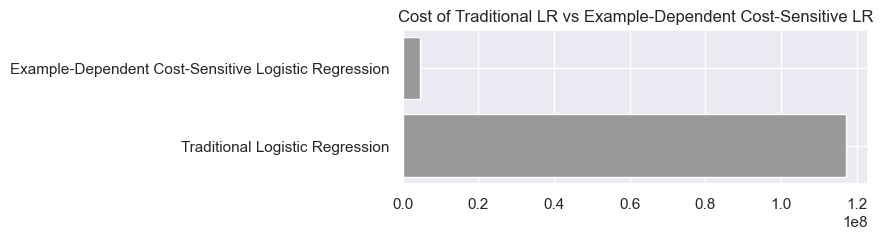

In [28]:
# # Create a horizontal bar chart

# # Data
# labels = ['Traditional Logistic Regression', 'Example-Dependent Cost Sensitive Logistic Regression']
# values = [lr_cost, cslr_cost]

# # Create bar plot
# plt.bar(labels, values)

# # Add labels and title
# plt.xlabel('LR Model')
# plt.ylabel('Cost')
# plt.title('Cost of Traditional LR vs Example-Dependent Cost-Sensitive LR using Nikou Gunnermann’s Approach')

# # Show plot
# plt.show()

# Create a horizontal bar chart

# # Data
# labels = ['Traditional Logistic Regression', 'Cost Sensitive Logistic Regression']
# values = [lr_cost, cslr_cost]

# # Create bar plot
# plt.bar(labels, values)

# # Add labels and title
# plt.xlabel('LR Model')
# plt.ylabel('Cost')
# plt.title('Cost of Traditional LR vs Cost-Sensitive LR')

# # Show plot
# plt.show()

fig, ax = plt.subplots(figsize=(6,2))  
labels = 'Traditional Logistic Regression', 'Example-Dependent Cost-Sensitive Logistic Regression'
values = [lr_cost, cslr_cost]
plt.barh(labels, values, align='center', color='#999999')
plt.title('Cost of Traditional LR vs Example-Dependent Cost-Sensitive LR')
plt.show()

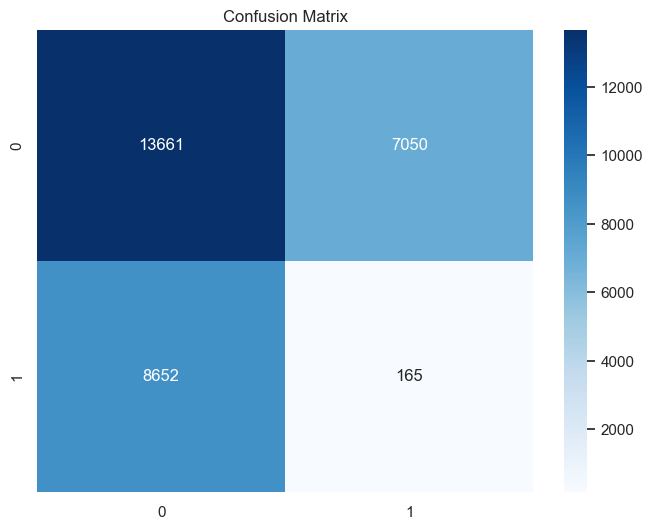

In [29]:
# Confusion Matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test, cslr_result)
# ConfusionMatrixDisplay.from_predictions(y_test, cslr_result,cmap='Reds')

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(y_test, cslr_result)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.xlabel('Predicted labels')
# plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

## Cost Difference

In [30]:
# Cost Difference
sc = saving_cost(lr_cost, cslr_cost)
print("Saving Cost: ", sc)

Saving Cost:  0.9602252089607871
